# Organize data from CSV to PKL

1. Load the CSV file containing P, T and XYZ atributes
2. Filter only the X coordinates for the midpoint along the Z axism i.e. $\approx 0.145$m
3. Build a dict with Time, X coordinates and Pressure.

### Notes
- The units of the variable P are of kinematic pressure [m²/s²], i.e. so $p/\rho$.
- Multiplying by the density $\rho$ will return dynamic pressure [kg/m/s²]
- Dividing by the gravity acceleration $g$ will return the hydraulic head [m]

In [1]:
import numpy as np
import pandas as pd   ## Using pandas<2.0
import pickle 
from os import system
import matplotlib.pyplot as plt

Specify the path to the post-processed boundary probes.

In [2]:
# File paths
FOLDER = "surface-water/simulations/LES_3D/hot_start/postProcessing/organizedData"

In [3]:
PFILE = f"{FOLDER}/p.txt"
TFILE = f"{FOLDER}/time.txt"
XFILE = f"{FOLDER}/xyz.txt"

# Load files using pandas
X = pd.read_csv(XFILE,sep=" ",names=['X','Y','Z'])
T = pd.read_csv(TFILE,delimiter=" ",header=None)
P = pd.read_csv(PFILE,delimiter=" ",header=None)

Select only points lying on the center of the channel to extract the pressure signal

In [4]:
# Filter X-coordinates by Z-axis
xCoords = pd.DataFrame(X[(X['Z']>0.13) & (X['Z']<0.15)][['X','Y','Z']])

# Filter pressure by the X-coordinates of interest
P_filtered = P[[xi for xi in xCoords.index]]

In [5]:
## Columns represent x-position and rows represent time steps.
P_filtered

,7,23,39,55,71,87,103,119,135,151,...,663,679,695,711,727,743,759,775,791,807
0,0.000636,0.000636,0.000701,0.000721,0.000706,0.000652,0.000563,0.000432,0.000266,0.000066,...,-0.000666,-0.000937,-0.001096,-0.000990,-0.000691,-0.000312,0.000042,0.000323,0.000518,0.000518
1,0.000634,0.000634,0.000704,0.000728,0.000716,0.000665,0.000578,0.000450,0.000285,0.000088,...,-0.000653,-0.000933,-0.001106,-0.001017,-0.000723,-0.000344,0.000016,0.000306,0.000509,0.000509
2,0.000630,0.000630,0.000705,0.000734,0.000726,0.000678,0.000594,0.000469,0.000307,0.000112,...,-0.000637,-0.000925,-0.001113,-0.001042,-0.000755,-0.000376,-0.000010,0.000288,0.000499,0.000499
3,0.000626,0.000626,0.000706,0.000738,0.000734,0.000689,0.000609,0.000488,0.000328,0.000136,...,-0.000621,-0.000918,-0.001121,-0.001066,-0.000786,-0.000409,-0.000037,0.000269,0.000488,0.000488
4,0.000620,0.000620,0.000704,0.000740,0.000739,0.000698,0.000620,0.000502,0.000346,0.000157,...,-0.000604,-0.000909,-0.001126,-0.001089,-0.000817,-0.000442,-0.000064,0.000250,0.000476,0.000476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194568,0.001124,0.001124,0.001217,0.001546,0.001949,0.002198,0.002220,0.002053,0.001745,0.001301,...,0.000052,0.000365,0.000706,0.001060,0.001392,0.001608,0.001650,0.001516,0.001280,0.001280
194569,0.001148,0.001148,0.001203,0.001499,0.001896,0.002162,0.002208,0.002060,0.001760,0.001320,...,0.000024,0.000333,0.000676,0.001036,0.001379,0.001618,0.001679,0.001561,0.001330,0.001330
194570,0.001181,0.001181,0.001197,0.001456,0.001844,0.002124,0.002194,0.002065,0.001775,0.001341,...,-0.000004,0.000303,0.000647,0.001014,0.001368,0.001628,0.001710,0.001608,0.001385,0.001385
194571,0.001219,0.001219,0.001200,0.001420,0.001793,0.002085,0.002177,0.002068,0.001789,0.001361,...,-0.000027,0.000276,0.000621,0.000994,0.001356,0.001637,0.001740,0.001654,0.001441,0.001441


Pickle this pandas dataframe for reuse in the next jupyter notebooks.

In [6]:
# Assemble a dict with the T,X and P
fullDict = {"Time":T,"xCoord":xCoords,"P":P_filtered}

# Pickle data
fname = "pickledData_constg/PTX(1).pkl"
with open(fname,'wb') as f: pickle.dump(fullDict,f)

Save the x-coordinates in a separate file that will go into OpenFOAM boundary condition declaration for the hydraulic head

In [7]:
# Save selected coordinates
fname = "cppCodebits/selectedXYZ.csv"
save_dict = dict(fmt='%10.8f',delimiter=" ",newline=" \n ",\
                 header="",footer="",comments='')

np.savetxt(fname,xCoords,**save_dict)
system(f"sed -i 's/^/( /g' {fname}; sed -i 's/$/ )/g' {fname}")

0

### Shape of the bed form

Make a simple plot of the bedform lenght and the elevation. 'y' corresponds to the vertical direction.

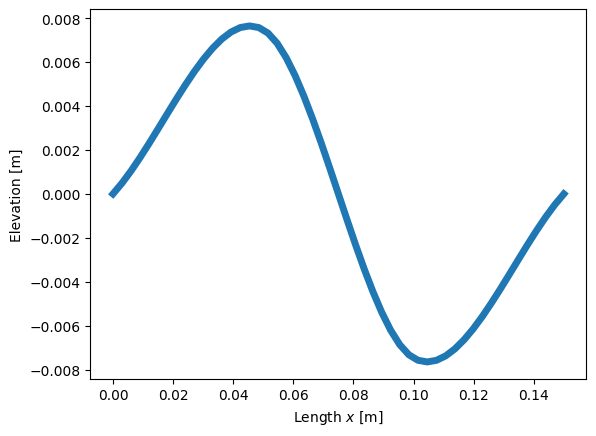

In [8]:
fig, ax = plt.subplots()
ax.plot(xCoords['X'],xCoords['Y'], lw=5)
ax.set_xlabel("Length $x$ [m]")
ax.set_ylabel("Elevation [m]")
plt.show()